In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nfl_data_py as nfl

In [2]:
# Turn off max columns for pandas DataFrame
pd.set_option('display.max_columns', None)

In [3]:
years = range(1999, 2023)

In [4]:
data = nfl.import_pbp_data(years)

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [5]:
# keep only these columns 'reciever', 'play_type', 'complete_pass'
df = data[['season', 'posteam', 'receiver', 'play_type', 'complete_pass']]


In [6]:
# Get the number of targets for each receiver
targets = df.groupby(['season', 'posteam', 'receiver'])\
          .count()\
            .reset_index()\
                .rename(columns={'complete_pass': 'targets'})\
                    .drop(columns=['play_type'])

In [7]:
# Get the total number of targets for each team in the given year
team_targets = targets.groupby(['season', 'posteam'])\
                .sum()\
                    .reset_index()\
                        .rename(columns={'targets': 'team_targets'})

# Merge the targets and team_targets DataFrames
targets = targets.merge(team_targets, on=['season', 'posteam'])

In [8]:
# Get the target share for each receiver
targets['target_share'] = targets['targets'] / targets['team_targets']

In [9]:
# Keep only the top target share reciever for each team and year
top_targets = targets.sort_values('target_share', ascending=False)\
                .drop_duplicates(['season', 'posteam'])\
                    .sort_values(['season', 'posteam'])\
                        .reset_index(drop=True)

In [10]:
# Get the average target share for the top target each year league wide, drop everything else
top_targets = top_targets.groupby('season')\
                .mean()\
                    .reset_index()\
                        .drop(columns=['targets', 'team_targets'])

In [11]:
top_targets

,season,target_share
0,1999,0.254798
1,2000,0.251754
2,2001,0.264422
3,2002,0.253587
4,2003,0.254809
5,2004,0.254994
6,2005,0.262631
7,2006,0.251405
8,2007,0.244561
9,2008,0.245813


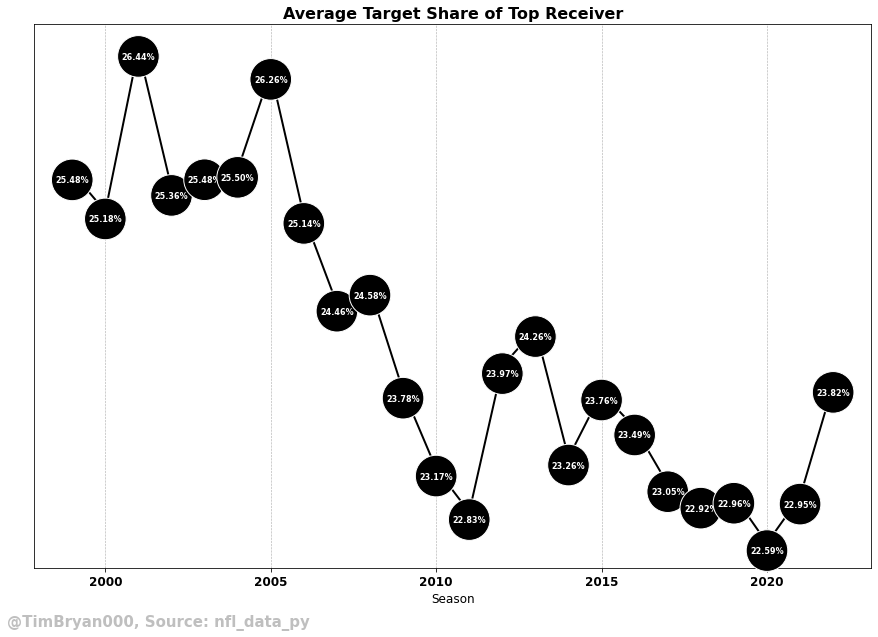

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Define custom font
font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size': 12}
mpl.rc('font', **font)

# Create a line plot with markers
plt.figure(figsize=(15, 10))

# Add title and labels
plt.title('Average Target Share of Top Receiver',
          fontsize=16, fontweight='bold')

# Create a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Plot the data
plt.plot(top_targets['season'], top_targets['target_share'], marker='o',
         color='black', linestyle='-', linewidth=2)

# Annotate each point with its target_share value (formatted as a percentage)
for i, row in top_targets.iterrows():
    plt.annotate(f'{row["target_share"]*100:.2f}%',
                 (row['season'], row['target_share']),
                 textcoords="offset points", xytext=(0, -10),
                 ha='center', fontsize=8, color='white',
                 bbox=dict(facecolor='black', edgecolor='white', boxstyle='circle,pad=0.5'))

plt.xlabel('Season')

# Hide y-axis labels
plt.yticks([])

# Add a watermark (moved to the left)
plt.text(0.10, 0.05, '@TimBryan000, Source: nfl_data_py', fontsize=15, color='gray',
         ha='left', va='center', alpha=0.5, transform=plt.gcf().transFigure)

# Save the plot as a high-quality image
plt.savefig('target_share_per_year.png', dpi=300)

# Show the plot
plt.show()
